In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from torch.nn import Sequential
from torch.utils.data import DataLoader
from torchvision.transforms import RandomHorizontalFlip, ToPILImage
from classes import PersonSegmentationDataset, ClothesSegmentationDataset
import matplotlib.pyplot as plt
from LookGenerator.config.config import DATASET_DIR

In [2]:
transforms = Sequential(
    RandomHorizontalFlip(),
)
train_dataset = ClothesSegmentationDataset(os.path.join(DATASET_DIR, "train"), transform=transforms)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

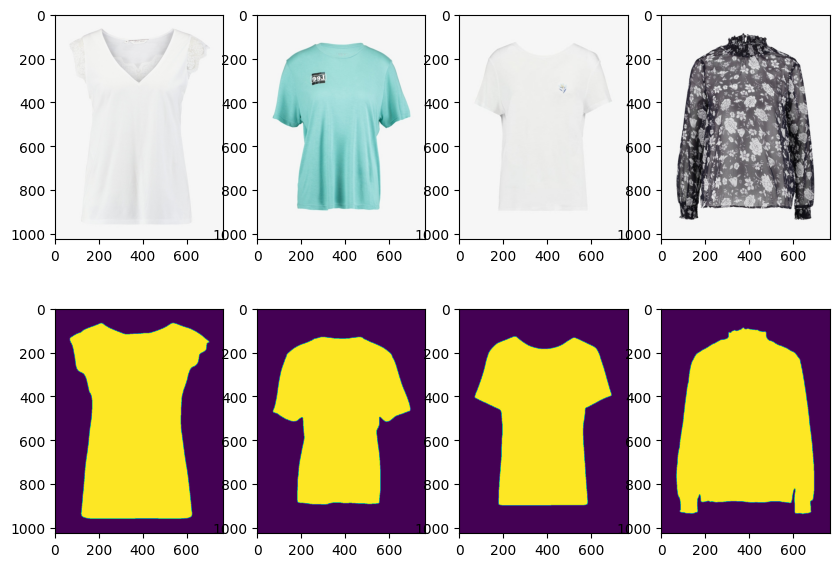

In [3]:
for data in train_loader:
    i = 0
    img = data["image"]
    seg = data["mask"]

    # Visual representation
    fig = plt.figure(figsize=(10, 7))
    for j in range(4):
        fig.add_subplot(2, 4, j + 1)
        plt.imshow(ToPILImage()(img[j]))
    for j in range(4):
        fig.add_subplot(2, 4, 5 + j)
        plt.imshow(ToPILImage()(seg[j]))
    if i == 0:
        break

In [4]:
train_dataset = PersonSegmentationDataset(os.path.join(DATASET_DIR, "train"), transform=transforms)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

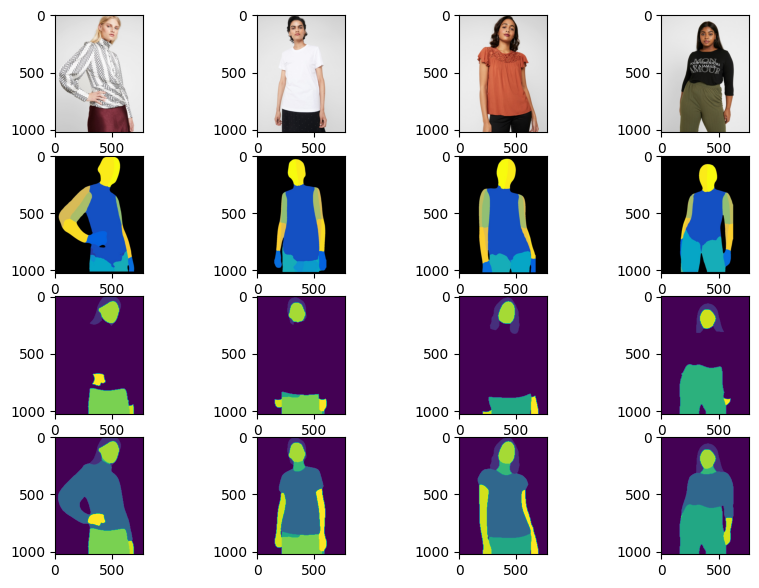

In [5]:
for data in train_loader:
    person = data["image"]
    seg1 = data["densepose"]
    seg2 = data["parse_agnostic"]
    seg3 = data["parse"]
    i = 0

    # Visual representation
    fig = plt.figure(figsize=(10, 7))
    for j in range(4):
        fig.add_subplot(4, 4, j + 1)
        plt.imshow(ToPILImage()(person[j]))
    for j in range(4):
        fig.add_subplot(4, 4, 5 + j)
        plt.imshow(ToPILImage()(seg1[j]))
    for j in range(4):
        fig.add_subplot(4, 4, 9 + j)
        plt.imshow(ToPILImage()(seg2[j]))
    for j in range(4):
        fig.add_subplot(4, 4, 13 + j)
        plt.imshow(ToPILImage()(seg3[j]))
    if i == 0:
        break